# Data 620 Final Project
## Pride and Prejudice and Oliver Twist - A Comparison Using Network Analysis and Text Processing
Jit Seneviratne and Sheryl Piechocki  
July 17, 2020

**Data**  
The data used in this project is the texts of two classic books, <u>Pride and Prejudice</u> by Jane Austen and <u>Oliver Twist</u> by Charles Dickens.  The text of both of these books is available on the Project Gutenberg website. 

Sources: 
* [Pride and Prejudice](https://www.gutenberg.org/files/1342/1342-0.txt)
* [Oliver Twist](http://www.gutenberg.org/cache/epub/730/pg730.txt)

**Analysis**  
After reading in the text of both books, they were cleaned and lemmatized and split into chapters.  Network analysis of the character projections was performed, including degree centrality and betweenness centrality measures.  Network graphs by volume were created to determine how the character networks changed over time in the books.  
Text analysis for each book includes the count of unique works, Zipf's law examination, most frequent words by chapter, character vector similarity using Word2Vec, and sentiment analysis at a sentence level for each chapter and compare the two novels for their general sentiment.


### Import modules and libraries for use

In [1]:
import nltk
import urllib
import pandas as pd
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import os
import re
from sklearn.manifold import TSNE
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import gensim
import string
from gensim import corpora
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import pickle

### Get texts from Gutenberg

In [2]:
pride = urllib.request.urlopen('https://www.gutenberg.org/files/1342/1342-0.txt').read()
pride_lines = pride.decode('utf8')

oliver = urllib.request.urlopen('http://www.gutenberg.org/cache/epub/730/pg730.txt').read()
oliver_lines = oliver.decode('utf8')

### Function to search chapters

In [35]:
def find_chapters(book):
    chapters = {}
    i = 0
    b = 0
    for x in range(1, 62):
        i = book.find("Chapter", + b)
        b = book.find("Chapter", i + 1)
        chapters['Chapter {}'.format(x)] = book[i:b]
    return chapters

def find_chapters_OT(book):
    chapters = {}
    i = 0
    b = 0
    for x in range(1, 54):
        i = book.find("CHAPTER ", + b)
        b = book.find("CHAPTER ", i + 1)
        chapters['Chapter {}'.format(x)] = book[i:b]
    return chapters

### Stopwords, cleaning and lemmatizing

In [92]:
stop_PP = stopwords.words('english') + ['mr',
                                     'mrs',
                                     'miss', 
                                     'say',
                                     'have', 
                                     'might',
                                     'thought',
                                     'would', 
                                     'could', 
                                     'make', 
                                     'much',
                                     'dear',
                                     'must',
                                     'know',
                                     'one',
                                     'good',
                                     'every',
                                     'towards',
                                     'give',
                                     'come',
                                     'go',
                                     'elizabeth', 
                                     'darcy', 
                                     'bingley', 
                                     'catherine',
                                     'mrbennet', 
                                     'mrsbennet', 
                                     'lydia',
                                     'wickham',
                                     'caroline',
                                     'jane',
                                     'collins',
                                     'charlotte',
                                     'kitty',
                                     'mary',
                                     'fitzwilliam',
                                     'mrgardiner',
                                     'mrsgardiner',
                                     'georgiana',
                                     'well',
                                     'see',
                                     'think',
                                     'though',
                                     'never',
                                     'always',
                                     'although',
                                     'may',
                                     'soon',
                                     'wish',
                                     'take',
                                     'great',
                                     'nothing',
                                     'something',
                                     'young',
                                     'look',
                                     'even',
                                     'cannot',
                                     'many',
                                     'few',
                                     'even',
                                     'however',
                                     'like',
                                     'lucas'
                                     'ever',
                                     'feel',
                                     'shall',
                                     'hope',
                                     'sure',
                                     'yes',
                                     'no',
                                     'oh',
                                     'two',
                                     'three',
                                     'first',
                                     'second',
                                     'third',
                                     'with',
                                     'without',
                                     'use',
                                     'quite']

stop = stopwords.words('english') + ['mr',
                                     'mrs',
                                     'miss', 
                                     'say',
                                     'have', 
                                     'might',
                                     'thought',
                                     'would', 
                                     'could', 
                                     'make', 
                                     'much',
                                     'dear',
                                     'must',
                                     'know',
                                     'one',
                                     'good',
                                     'every',
                                     'towards',
                                     'give',
                                     'come',
                                     'go',
                                     'well',
                                     'see',
                                     'think',
                                     'though',
                                     'never',
                                     'always',
                                     'although',
                                     'may',
                                     'soon',
                                     'wish',
                                     'take',
                                     'great',
                                     'nothing',
                                     'something',
                                     'young',
                                     'look',
                                     'even',
                                     'cannot',
                                     'many',
                                     'few',
                                     'even',
                                     'however',
                                     'like',
                                     'lucas'
                                     'ever',
                                     'feel',
                                     'shall',
                                     'hope',
                                     'sure',
                                     'yes',
                                     'no',
                                     'oh',
                                     'two',
                                     'three',
                                     'first',
                                     'second',
                                     'third',
                                     'with',
                                     'without',
                                     'use',
                                     'quite',
                                     'dont',
                                     'oliver',
                                     'fagin',
                                     'nancy',
                                     'bill',
                                     'dodger',
                                     'mrbrownlow',
                                     'mrbumble',
                                     'charley',
                                     'dodger',
                                     'mrsowerberry',
                                     'mrssowerberry',
                                     'mrsmaylie',
                                     'noah',
                                     'charlotte',
                                     'sikes',
                                     'maylie',
                                     'bates',
                                     'toby' ,
                                     'gamfield',
                                     'grimwig',
                                     'barney',
                                     'chitling',
                                     'harry',
                                     'giles',
                                     'monk',
                                     'jew']

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    try:
        tag = get_wordnet_pos(nltk.pos_tag([word])[0][1])
        return lemmatizer.lemmatize(word, pos=tag)
    except:
        pass

### Split corpus into sentences, clean and lemmatize functions

In [5]:
def all_sentences_PP(corpus,
                  include_stop=True):
    vocab = []
    
    text = corpus.replace('Fitzwilliam Darcy','Darcy')\
                 .replace('Fitzwilliam', 'Darcy')\
                 .replace('Lizzy','Elizabeth')\
                 .replace('LIZZY','Elizabeth')\
                 .replace('Mrs. Collins', 'Charlotte')\
                 .replace('Charlotte Lucas', 'Charlotte')\
                 .replace('Mr. Bennet', 'MrBennet')\
                 .replace('Mrs. Bennet', 'MrsBennet')\
                 .replace('Mr. Gardiner', 'MrGardiner')\
                 .replace('Mrs. Gardiner', 'MrsGardiner')\
    
    for line in sent_tokenize(text):
        line= re.sub('[%s]|Chapter' % re.escape(string.punctuation), '', line)
        line = re.sub('[^a-zA-Z\ ]', '', line)
        line = line.lower()
        line = line.split()
        if include_stop:
            line = [lemmatize_word(x) for x in line if lemmatize_word(x) not in stop_PP]
        else:
            line = [lemmatize_word(x) for x in line]
        vocab.append(line)
    return vocab

In [6]:
def all_sentences(corpus,
                  include_stop=True):
    vocab = []
    
    text = corpus.replace('Oliver Twist', 'Oliver')\
                 .replace('Bill Sikes', 'Bill')\
                 .replace('Mr. Brownlow', 'MrBrownlow')\
                 .replace('Mr. Bumble', 'MrBumble')\
                 .replace('Charley Bates', 'Charley')\
                 .replace('Artful Dodger', 'Dodger')\
                 .replace('Mr. Sowerberry', 'MrSowerberry')\
                 .replace('Mrs. Sowerberry', 'MrsSowerberry')\
                 .replace('Mrs. Maylie', 'MrsMaylie')\
                 .replace('Jew', 'Fagin')\
                 .replace('Noah Claypole', 'Noah')
    
    sentiment_list = []
    
    for line in sent_tokenize(text):
        
        line= re.sub('[%s]|Chapter' % re.escape(string.punctuation), '', line)
        line = re.sub('[^a-zA-Z\ ]', '', line)
        line = line.lower()
        line = line.split()
        if include_stop:
            line = [lemmatize_word(x) for x in line if lemmatize_word(x) not in stop]
        else:
            line = [lemmatize_word(x) for x in line]
        vocab.append(line)
    return vocab

### Function to get word frequencies

In [7]:
def get_frequecies(corpus):
    dictionary = corpora.Dictionary(corpus)
    # You can check the mapping by caling 'token2id' attribute.
    id_map = dictionary.token2id
    count_map = dictionary.dfs
    word_count = {}
    for word, id_ in id_map.items():
        word_count[word] = count_map[id_]
    sorted_corpus = sorted([(x,y) 
                           for x,y in word_count.items()], 
                           key=lambda x: x[1], reverse=True)
    return sorted_corpus

### Top Keywords in Each Book

The top 10 words in each book is shown below.  Pride and Prejudice top words contain sister, lady, and friend.  Oliver Twist has top words including old, man, and boy.  These fit since Pride and Prejudice is about 5 sisters and Oliver Twist centers around an orphan boy.

In [94]:
full_corpus_PP = all_sentences_PP(pride_lines[2229:-19175])
frequencies_PP = get_frequecies(full_corpus_PP)

print('Pride and Prejudice by Jane Austen')
print('Top 10 Words by Frequency')
print('----------------------------------')
print('Word         Frequency')
print('----------------------------------')
for word, freq in sorted([(x,y) 
              for x,y in dict(frequencies_PP).items()], 
              key=lambda x: x[1], reverse=True)[:10]:
    print('{:<12}  {}'.format(word, freq))
    
full_corpus = all_sentences(oliver_lines[6255:-19184])
frequencies = get_frequecies(full_corpus)
print('----------------------------------')
print('Oliver Twist by Charles Dickens')
print('Top 10 Words by Frequency')
print('----------------------------------')
print('Word         Frequency')
print('----------------------------------')
for word, freq in sorted([(x,y) 
              for x,y in dict(frequencies).items()], 
              key=lambda x: x[1], reverse=True)[:10]:
    print('{:<11}  {}'.format(word, freq))

Pride and Prejudice by Jane Austen
Top 10 Words by Frequency
----------------------------------
Word         Frequency
----------------------------------
sister        286
lady          252
time          217
little        182
day           159
friend        158
family        156
man           145
manner        137
reply         132
Oliver Twist by Charles Dickens
Top 10 Words by Frequency
----------------------------------
Word         Frequency
----------------------------------
reply        500
upon         388
old          378
man          339
boy          322
time         310
gentleman    291
hand         283
cry          229
lady         228


### Total Unique Words  
Pride and Prejudice contains only 4,971 unique words, compared to 16,217 unique words in Oliver Twist.  

In [24]:
print('Pride and Prejudice Count of Unique Words (excluding Stop Words): ', len(frequencies_PP)) 
print('Oliver Twist        Count of Unique Words (excluding Stop Words): ', len(frequencies)) 

Pride and Prejudice Count of Unique Words (excluding Stop Words):  4971
Oliver Twist        Count of Unique Words (excluding Stop Words):  16217


### Check to see if corpus of each book follows Zipf's law  
In the graph below, it appears that Oliver Twist more closely follows Zipf's Law, as evidenced by a slightly straighter line than for Pride and Prejudice. 

In [25]:
full_corpus2_PP = all_sentences_PP(pride_lines[2229:-19175], include_stop=False)
frequencies2_PP = get_frequecies(full_corpus2_PP)
samples_PP = list(dict(frequencies2_PP).keys())
freqs_PP = list(dict(frequencies2_PP).values())

df_words_PP = pd.DataFrame()
df_words_PP['frequency'] = freqs_PP
df_words_PP['word'] = samples_PP

full_corpus2 = all_sentences(oliver_lines[6255:-19184], include_stop=False)
frequencies2 = get_frequecies(full_corpus2)
samples2 = list(dict(frequencies2).keys())
freqs2 = list(dict(frequencies2).values())

df_words = pd.DataFrame()
df_words['frequency'] = freqs2
df_words['word'] = samples2

In [32]:
fig = go.Figure()

fig.add_trace(go.Scatter(y = np.log(df_words_PP['frequency']), x = np.log(df_words_PP.index + 1), name = 'Pride and Prejudice'))

fig.update_layout(go.Layout(
    title='Word Rank vs Word Frequency Comparison<br>Pride and Prejudice vs. Oliver Twist<br><sub>Including Stop Words</sub>',
    width=800,
    height=500,
    xaxis=dict(
        title='Log Rank' 
    ),
    yaxis=dict(
        title='Log Frequency', tickfont=dict(size=7)
    )
))

fig.add_trace(go.Scatter(y = np.log(df_words['frequency']), x = np.log(df_words.index + 1), name = 'Oliver Twist'))


fig.show()

### Top Keywords in each chapter

In [33]:
text_PP = find_chapters(pride_lines[2229:-19175])
for chapter in ['Chapter {}'.format(x) for x in range(1, 62)]:
    corpus_PP = all_sentences_PP(text_PP[chapter])
    print('{}'.format(chapter), get_frequecies(corpus_PP)[:5])

Chapter 1 [('visit', 5), ('man', 4), ('single', 4), ('wife', 4), ('girl', 4)]
Chapter 2 [('visit', 4), ('acquaintance', 4), ('till', 3), ('wife', 3), ('long', 3)]
Chapter 3 [('dance', 14), ('lady', 8), ('room', 8), ('sister', 7), ('handsome', 6)]
Chapter 4 [('sister', 5), ('people', 4), ('house', 4), ('man', 3), ('character', 3)]
Chapter 5 [('lucas', 7), ('seem', 4), ('believe', 4), ('pride', 4), ('bennet', 3)]
Chapter 6 [('dance', 10), ('sir', 8), ('lucas', 7), ('lady', 6), ('sister', 6)]
Chapter 7 [('mother', 7), ('meryton', 7), ('father', 6), ('officer', 6), ('sister', 5)]
Chapter 8 [('sister', 14), ('lady', 7), ('accomplish', 7), ('bennet', 6), ('hurst', 5)]
Chapter 9 [('country', 9), ('mother', 8), ('sister', 5), ('girl', 5), ('netherfield', 5)]
Chapter 10 [('letter', 8), ('write', 8), ('friend', 6), ('hurst', 5), ('cry', 5)]
Chapter 11 [('laugh', 6), ('hurst', 6), ('book', 6), ('conversation', 5), ('room', 5)]
Chapter 12 [('netherfield', 4), ('carriage', 3), ('day', 3), ('morning

In [36]:
text = find_chapters_OT(oliver_lines[6255:-19184])
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    corpus = all_sentences(text[chapter])
    print('{}'.format(chapter), get_frequecies(corpus)[:5])

Chapter 1 [('child', 7), ('surgeon', 7), ('nurse', 5), ('hand', 5), ('head', 4)]
Chapter 2 [('mann', 24), ('gentleman', 17), ('beadle', 16), ('boy', 16), ('sir', 11)]
Chapter 3 [('gentleman', 28), ('old', 15), ('boy', 14), ('white', 12), ('waistcoat', 11)]
Chapter 4 [('undertaker', 23), ('boy', 12), ('reply', 11), ('beadle', 10), ('little', 7)]
Chapter 5 [('old', 15), ('sir', 14), ('undertaker', 12), ('reply', 12), ('woman', 12)]
Chapter 6 [('workus', 8), ('reply', 6), ('head', 5), ('bad', 4), ('eye', 4)]
Chapter 7 [('reply', 14), ('sir', 11), ('boy', 10), ('upon', 6), ('time', 6)]
Chapter 8 [('gentleman', 14), ('boy', 13), ('old', 9), ('little', 9), ('london', 8)]
Chapter 9 [('old', 16), ('time', 11), ('reply', 11), ('sir', 11), ('boy', 10)]
Chapter 10 [('gentleman', 16), ('stop', 15), ('old', 14), ('thief', 11), ('boy', 10)]
Chapter 11 [('fang', 33), ('old', 20), ('man', 16), ('gentleman', 16), ('reply', 14)]
Chapter 12 [('old', 32), ('lady', 25), ('gentleman', 13), ('sir', 13), ('li

### Get edgelist from text characters and chapters  


In [37]:
edge_list_PP = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 62)]:
    text_PP[chapter] = text_PP[chapter].replace('Fitzwilliam Darcy','Darcy')\
                                 .replace('Fitzwilliam', 'Darcy')\
                                 .replace('Lizzy','Elizabeth')\
                                 .replace('Mrs. Collins', 'Charlotte')\
                                 .replace('Mr. Bennet', 'MrBennet')\
                                 .replace('Mrs. Bennet', 'MrsBennet')\
                                 .replace('Mr. Gardiner', 'MrGardiner')\
                                 .replace('Mrs. Gardiner', 'MrsGardiner')
    for name in ['Elizabeth', 
                 'Darcy', 
                 'Bingley', 
                 'Catherine',
                 'MrBennet', 
                 'MrsBennet',
                 'Lydia',
                 'Wickham',
                 'Caroline',
                 'Jane',
                 'Collins',
                 'Charlotte',
                 'Kitty',
                 'Mary',
                 'Maria',
                 'MrGardiner',
                 'MrsGardiner',
                 'Georgiana']:
        #print(chapter, name, len(re.findall(name, text[chapter])))
        edge_list_PP.append((chapter, name, len(re.findall(name, text_PP[chapter]))))

data_df_PP = pd.DataFrame(edge_list_PP)
data_df_PP.columns = ['Chapter', 'Character', 'Weight']
data_df_PP = data_df_PP[data_df_PP['Weight']>0]

In [38]:
edge_list = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    text[chapter] = text[chapter].replace('Oliver Twist', 'Oliver')\
                                 .replace('Bill Sikes', 'Bill')\
                                 .replace('Mr. Brownlow', 'MrBrownlow')\
                                 .replace( 'Mr. Bumble', 'MrBumble')\
                                 .replace('Charley Bates', 'Charley')\
                                 .replace('Artful Dodger', 'Dodger')\
                                 .replace('Mr. Sowerberry', 'MrSowerberry')\
                                 .replace('Mrs. Sowerberry', 'MrsSowerberry')\
                                 .replace('Mrs. Maylie', 'MrsMaylie')\
                                 .replace('Jew', 'Fagin')\
                                 .replace('Noah Claypole', 'Noah')

    for name in ['Oliver',
                 'Fagin',
                 'Nancy',
                 'Bill',
                 'Dodger',
                 'MrBrownlow',
                 'MrBumble',
                 'Charley',
                 'Dodger',
                 'MrSowerberry',
                 'MrsSowerberry',
                 'MrsMaylie',
                 'Noah',
                 'Charlotte',
                 'Monks']:
        #print(chapter, name, len(re.findall(name, text[chapter])))
        edge_list.append((chapter, name, len(re.findall(name, text[chapter]))))

data_df = pd.DataFrame(edge_list)
data_df.columns = ['Chapter', 'Character', 'Weight']
data_df = data_df[data_df['Weight']>0]

### Build graphs

In [39]:
B_PP = nx.Graph()

B_PP.add_nodes_from(data_df_PP['Chapter'],
                 bipartite=0)
B_PP.add_nodes_from(data_df_PP['Character'],
                 bipartite=1)

B_PP.add_weighted_edges_from(
    [(row['Chapter'], 
      row['Character'],
      row['Weight']) for idx, row in data_df_PP.iterrows()])

B = nx.Graph()

B.add_nodes_from(data_df['Chapter'],
                 bipartite=0)
B.add_nodes_from(data_df['Character'],
                 bipartite=1)

B.add_weighted_edges_from(
    [(row['Chapter'], 
      row['Character'],
      row['Weight']) for idx, row in data_df.iterrows()])

### Get character projection

In [40]:
character_filter_PP = {n for n, d in B_PP.nodes(data=True) if d['bipartite']==1}

# project bipartite graph onto character nodes keeping number of co-occurences, weighted degree
B_character_PP = nx.bipartite.weighted_projected_graph(B_PP, character_filter_PP)

character_filter = {n for n, d in B.nodes(data=True) if d['bipartite']==1}

# project bipartite graph onto character nodes keeping number of co-occurences, weighted degree
B_character = nx.bipartite.weighted_projected_graph(B, character_filter)

### Pride and Prejudice Network Graph  
In the character network of Pride and Prejudice, Elizabeth, Jane, Darcy, and Bingley form a close connection in the center of the graph.  These characters have many interactions as evidenced by the thicker connecting lines.  The rest of the characters form two sets, a secondary set with intermediary connections, and an outlying set with minimal connections to fewer characters.

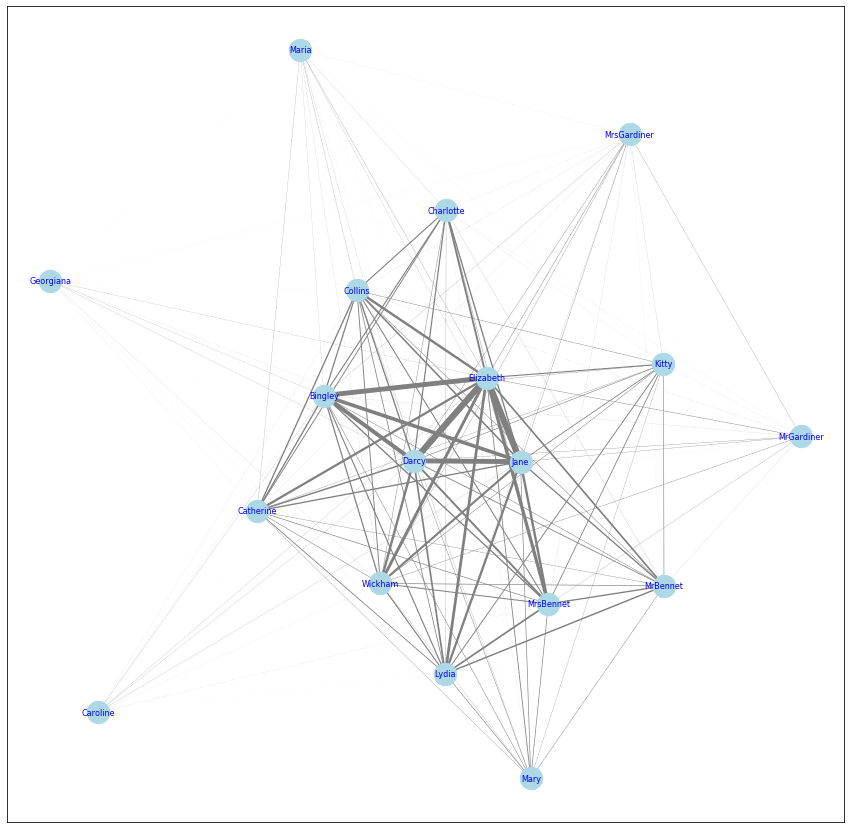

In [41]:
plt.figure(figsize=(15,15));
pos_PP = nx.spring_layout(B_character_PP, iterations = 50);
edges_PP = B_character_PP.edges()
weights_PP = [(B_character_PP[u][v]['weight']/20)**2 for u,v in edges_PP]
nx.draw_networkx_nodes(B_character_PP, pos_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_PP, pos_PP,  edge_color='gray', width=weights_PP);
nx.draw_networkx_labels(B_character_PP, pos_PP, font_size=8, font_color ='blue');

### Oliver Twist Network Graph  
In Oliver Twist, Oliver and Fagin have the strongest connection.  Mr. Bumble and Mr. Brownlow are closely connected to Oliver, while Nancy, Dodger, Charley, and Bill are all very closely connected to Fagin. 

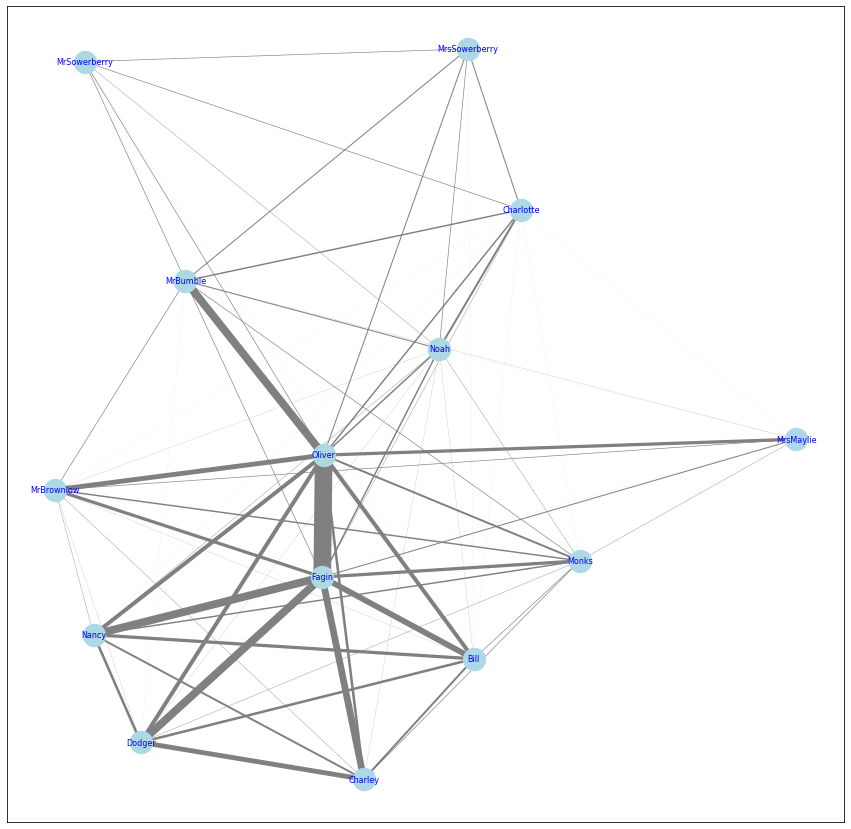

In [44]:
plt.figure(figsize=(15,15));
pos = nx.spring_layout(B_character, iterations = 50);
edges = B_character.edges()
weights = [(B_character[u][v]['weight']/5)**2 for u,v in edges]
nx.draw_networkx_nodes(B_character, pos, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character, pos,  edge_color='gray', width=weights);
nx.draw_networkx_labels(B_character, pos, font_size=8, font_color ='blue');

### Character degree centrality  
Elizabeth has the most connections to other characters, thus she has the highest degree centrality in Pride and Prejuduce.  In Oliver Twist, Oliver has the largest degree centrality, i.e. connections to other characters.  Comparing the books, we see that Elizabeth's degree centrality is higher than Oliver's.

In [49]:
char_deg_cent_PP = {k:v for k,v in dict(nx.degree_centrality(B_PP)).items()}
print('-----------------------------------------------')
print('Pride and Prejudice: Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print(' ')
print('-----------------------------------------------')    
char_deg_cent = {k:v for k,v in dict(nx.degree_centrality(B)).items()}
print('Oliver Twist:  Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

-----------------------------------------------
Pride and Prejudice: Character Degree Centrality 
-----------------------------------------------
Elizabeth - Degree Centrality: 0.782
Jane - Degree Centrality: 0.641
Darcy - Degree Centrality: 0.641
Bingley - Degree Centrality: 0.564
MrsBennet - Degree Centrality: 0.462
 
-----------------------------------------------
Oliver Twist:  Character Degree Centrality 
-----------------------------------------------
Oliver - Degree Centrality: 0.621
Fagin - Degree Centrality: 0.47
MrBumble - Degree Centrality: 0.227
Nancy - Degree Centrality: 0.227
Bill - Degree Centrality: 0.212


### Character betweenness centrality  
Both Elizabeth and Oliver have the highest betweenness centrality in their books, but comparing the two, we see Elizabeth has a much higher betweenness centrality than Oliver.  Therefore, she acts as a bridge to other characters in Pride and Prejudice more often than Oliver does in Oliver Twist.

In [50]:
b_bet_cent_PP = {k:v for k,v in dict(nx.betweenness_centrality(B_PP)).items()}
print('-----------------------------------------------')
print('Pride and Prejudice: Betweenness Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in b_bet_cent_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Betweenness Centrality:',round(cdegree,3))
print(' ')
print('-----------------------------------------------')      
b_bet_cent = {k:v for k,v in dict(nx.betweenness_centrality(B_character)).items()}
print('Oliver Twist:  Betweenness Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in b_bet_cent.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Betweenness Centrality:',round(cdegree,3))

-----------------------------------------------
Pride and Prejudice: Betweenness Centrality 
-----------------------------------------------
Elizabeth - Betweenness Centrality: 0.195
Darcy - Betweenness Centrality: 0.112
Jane - Betweenness Centrality: 0.107
Bingley - Betweenness Centrality: 0.087
MrsBennet - Betweenness Centrality: 0.05
 
-----------------------------------------------
Oliver Twist:  Betweenness Centrality 
-----------------------------------------------
Oliver - Betweenness Centrality: 0.055
Noah - Betweenness Centrality: 0.055
Bill - Betweenness Centrality: 0.043
MrBumble - Betweenness Centrality: 0.033
Charlotte - Betweenness Centrality: 0.031


### Pride and Prejudice Networks by Volume

In [51]:
edges_V1_PP = [(u,v) for u,v,e in B_PP.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(1, 24)]]
B_V1_PP = B_PP.edge_subgraph(edges_V1_PP)

#print(edges_V1)
character_filter_V1_PP = {n for n, d in B_V1_PP.nodes(data=True) if d['bipartite']==1}
B_character_V1_PP = nx.bipartite.weighted_projected_graph(B_V1_PP, character_filter_V1_PP)

In [52]:
edges_V2_PP = [(u,v) for u,v,e in B_PP.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(24, 43)]]
B_V2_PP = B_PP.edge_subgraph(edges_V2_PP)

#print(edges_V2)
character_filter_V2_PP = {n for n, d in B_V2_PP.nodes(data=True) if d['bipartite']==1}
B_character_V2_PP = nx.bipartite.weighted_projected_graph(B_V2_PP, character_filter_V2_PP)

In [53]:
edges_V3_PP = [(u,v) for u,v,e in B_PP.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(43, 62)]]
B_V3_PP = B_PP.edge_subgraph(edges_V3_PP)

#print(edges_V3)
character_filter_V3_PP = {n for n, d in B_V3_PP.nodes(data=True) if d['bipartite']==1}
B_character_V3_PP = nx.bipartite.weighted_projected_graph(B_V3_PP, character_filter_V3_PP)

### Pride and Prejudice Network Graphs by Volume

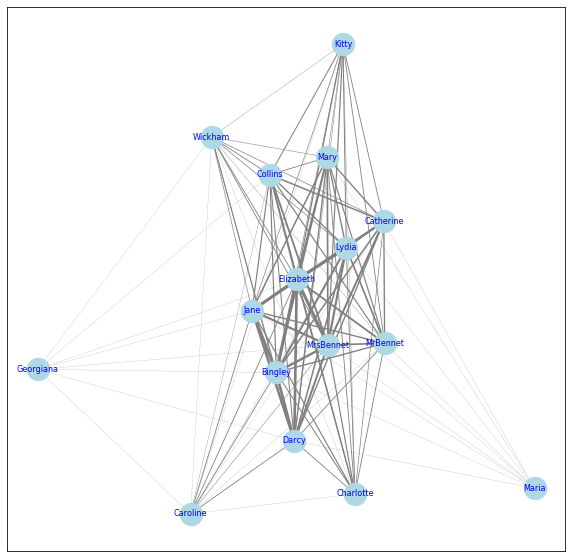

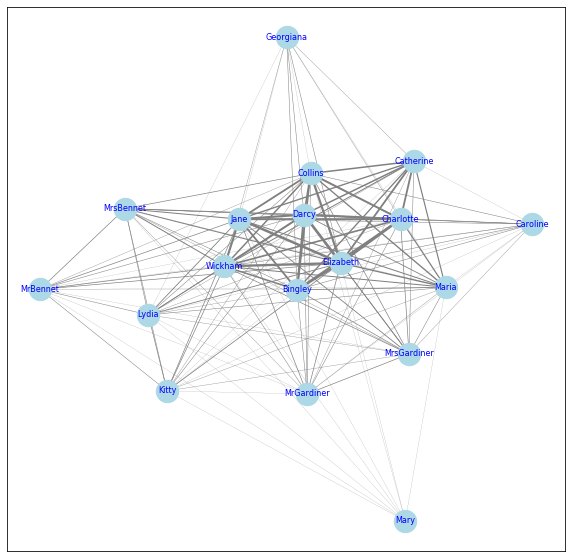

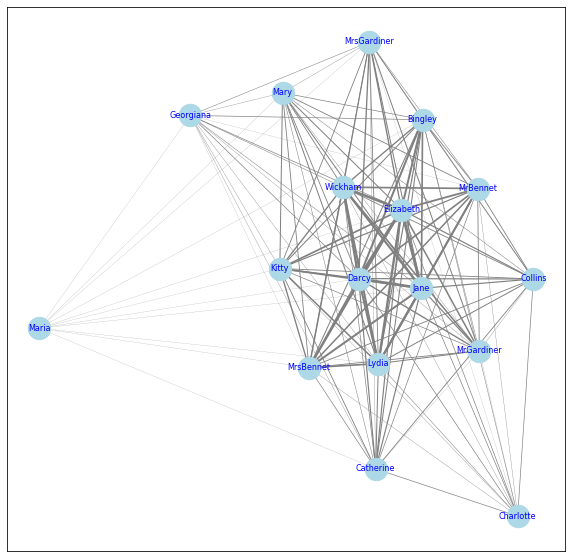

In [54]:
plt.figure(figsize=(10,10));
plt.figure(1)
pos1_PP = nx.spring_layout(B_character_V1_PP, iterations = 50);
edges_V1_PP = B_character_V1_PP.edges()
weights_V1_PP = [(B_character_V1_PP[u][v]['weight']/6) for u,v in edges_V1_PP]
nx.draw_networkx_nodes(B_character_V1_PP, pos1_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V1_PP, pos1_PP,  edge_color='gray', width=weights_V1_PP);
nx.draw_networkx_labels(B_character_V1_PP, pos1_PP, font_size=8, font_color ='blue');

plt.figure(figsize=(10,10));
plt.figure(2)
pos2_PP = nx.spring_layout(B_character_V2_PP, iterations = 50);
edges_V2_PP = B_character_V2_PP.edges()
weights_V2_PP = [(B_character_V2_PP[u][v]['weight']/6) for u,v in edges_V2_PP]
nx.draw_networkx_nodes(B_character_V2_PP, pos2_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V2_PP, pos2_PP,  edge_color='gray', width=weights_V2_PP);
nx.draw_networkx_labels(B_character_V2_PP, pos2_PP, font_size=8, font_color ='blue');

plt.figure(figsize=(10,10));
plt.figure(3)
pos3_PP = nx.spring_layout(B_character_V3_PP, iterations = 50);
edges_V3_PP = B_character_V3_PP.edges()
weights_V3_PP = [(B_character_V3_PP[u][v]['weight']/6) for u,v in edges_V3_PP]
nx.draw_networkx_nodes(B_character_V3_PP, pos3_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V3_PP, pos3_PP,  edge_color='gray', width=weights_V3_PP);
nx.draw_networkx_labels(B_character_V3_PP, pos3_PP, font_size=8, font_color ='blue');

plt.show()

### Oliver Twist Networks by Volume

In [57]:
edges_V1 = [(u,v) for u,v,e in B.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(1, 23)]]
B_V1 = B.edge_subgraph(edges_V1)

#print(edges_V1)
character_filter_V1 = {n for n, d in B_V1.nodes(data=True) if d['bipartite']==1}
B_character_V1 = nx.bipartite.weighted_projected_graph(B_V1, character_filter_V1)

In [58]:
edges_V2 = [(u,v) for u,v,e in B.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(23, 37)]]
B_V2 = B.edge_subgraph(edges_V2)

#print(edges_V2)
character_filter_V2 = {n for n, d in B_V2.nodes(data=True) if d['bipartite']==1}
B_character_V2 = nx.bipartite.weighted_projected_graph(B_V2, character_filter_V2)

In [59]:
edges_V3 = [(u,v) for u,v,e in B.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(37, 54)]]
B_V3 = B.edge_subgraph(edges_V3)

#print(edges_V3)
character_filter_V3 = {n for n, d in B_V3.nodes(data=True) if d['bipartite']==1}
B_character_V3 = nx.bipartite.weighted_projected_graph(B_V3, character_filter_V3)

### Oliver Twist Network Graphs by Volume

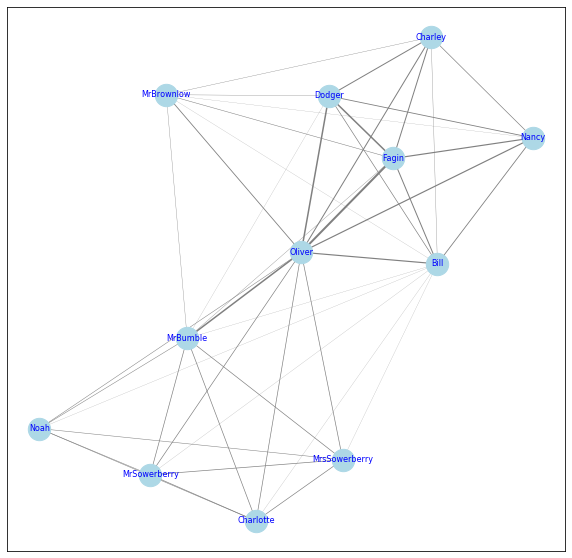

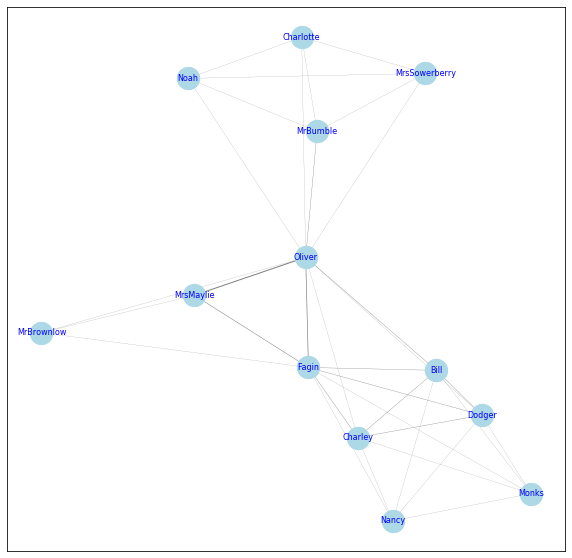

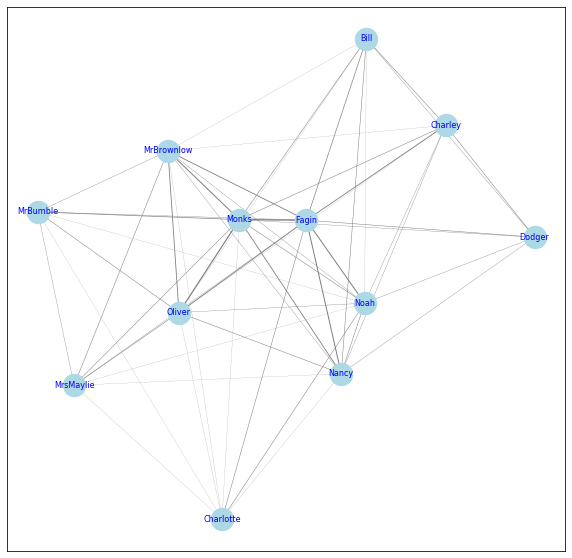

In [60]:
plt.figure(figsize=(10,10));
plt.figure(1)
pos1 = nx.spring_layout(B_character_V1, iterations = 50);
edges_V1 = B_character_V1.edges()
weights_V1 = [(B_character_V1[u][v]['weight']/6) for u,v in edges_V1]
nx.draw_networkx_nodes(B_character_V1, pos1, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V1, pos1,  edge_color='gray', width=weights_V1);
nx.draw_networkx_labels(B_character_V1, pos1, font_size=8, font_color ='blue');

plt.figure(figsize=(10,10));
plt.figure(2)
pos2 = nx.spring_layout(B_character_V2, iterations = 50);
edges_V2 = B_character_V2.edges()
weights_V2 = [(B_character_V2[u][v]['weight']/6) for u,v in edges_V2]
nx.draw_networkx_nodes(B_character_V2, pos2, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V2, pos2,  edge_color='gray', width=weights_V2);
nx.draw_networkx_labels(B_character_V2, pos2, font_size=8, font_color ='blue');

plt.figure(figsize=(10,10));
plt.figure(3)
pos3 = nx.spring_layout(B_character_V3, iterations = 50);
edges_V3 = B_character_V3.edges()
weights_V3 = [(B_character_V3[u][v]['weight']/6) for u,v in edges_V3]
nx.draw_networkx_nodes(B_character_V3, pos3, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V3, pos3,  edge_color='gray', width=weights_V3);
nx.draw_networkx_labels(B_character_V3, pos3, font_size=8, font_color ='blue');

plt.show()

### Character degree centrality by Volume

In [56]:
char_deg_cent1_PP = {k:v for k,v in dict(nx.degree_centrality(B_V1_PP)).items()}
print('-----------------------------------------------')
print('Pride and Prejudice')
print('-----------------------------------------------')
print('Volume 1 Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent1_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent2_PP = {k:v for k,v in dict(nx.degree_centrality(B_V2_PP)).items()}
print('Volume 2 Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent2_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent3_PP = {k:v for k,v in dict(nx.degree_centrality(B_V3_PP)).items()}
print('Volume 3 Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent3_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

-----------------------------------------------
Pride and Prejudice
-----------------------------------------------
Volume 1 Character Degree Centrality 
-----------------------------------------------
Elizabeth - Degree Centrality: 0.605
Bingley - Degree Centrality: 0.5
MrsBennet - Degree Centrality: 0.474
Jane - Degree Centrality: 0.474
Darcy - Degree Centrality: 0.421
-----------------------------------------------
Volume 2 Character Degree Centrality 
-----------------------------------------------
Elizabeth - Degree Centrality: 0.528
Darcy - Degree Centrality: 0.444
Charlotte - Degree Centrality: 0.417
Jane - Degree Centrality: 0.417
Wickham - Degree Centrality: 0.389
-----------------------------------------------
Volume 3 Character Degree Centrality 
-----------------------------------------------
Elizabeth - Degree Centrality: 0.543
Darcy - Degree Centrality: 0.514
Jane - Degree Centrality: 0.486
Wickham - Degree Centrality: 0.429
Lydia - Degree Centrality: 0.4


In [61]:
char_deg_cent1 = {k:v for k,v in dict(nx.degree_centrality(B_V1)).items()}
print('-----------------------------------------------')
print('Oliver Twist')
print('-----------------------------------------------')
print('Volume 1 Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent1.items()  if x not in ['Chapter {}'.format(x) for x in range(1, 23)]]     , 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent2 = {k:v for k,v in dict(nx.degree_centrality(B_V2)).items()}
print('Volume 2 Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent2.items() if x not in ['Chapter {}'.format(x) for x in range(23, 37)]]     , 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent3 = {k:v for k,v in dict(nx.degree_centrality(B_V3)).items()}
print('Volume 3 Character Degree Centrality ')
print('-----------------------------------------------')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent3.items() if x not in ['Chapter {}'.format(x) for x in range(37,54)]]     , 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

-----------------------------------------------
Oliver Twist
-----------------------------------------------
Volume 1 Character Degree Centrality 
-----------------------------------------------
Oliver - Degree Centrality: 0.667
Fagin - Degree Centrality: 0.364
MrBumble - Degree Centrality: 0.273
Dodger - Degree Centrality: 0.273
Bill - Degree Centrality: 0.212
-----------------------------------------------
Volume 2 Character Degree Centrality 
-----------------------------------------------
Oliver - Degree Centrality: 0.462
MrsMaylie - Degree Centrality: 0.269
Fagin - Degree Centrality: 0.192
Bill - Degree Centrality: 0.115
MrBumble - Degree Centrality: 0.077
-----------------------------------------------
Volume 3 Character Degree Centrality 
-----------------------------------------------
Fagin - Degree Centrality: 0.5
Monks - Degree Centrality: 0.393
Oliver - Degree Centrality: 0.25
Nancy - Degree Centrality: 0.25
MrBrownlow - Degree Centrality: 0.214


### Graph Center

In [63]:
print('Pride and Prejudice Graph Center')
print('Overall:', nx.center(B_PP))
print('Volume 1:',nx.center(B_V1_PP))
print('Volume 2:',nx.center(B_V2_PP))
print('Volume 3:',nx.center(B_V3_PP))

Pride and Prejudice Graph Center
Overall: ['Elizabeth']
Volume 1: ['Elizabeth']
Volume 2: ['Elizabeth']
Volume 3: ['Elizabeth']


In [65]:
print('Oliver Twist Graph Center')
cent = {k for k in nx.center(B) if k not in ['Chapter {}'.format(x) for x in range(1,54)]}
print('Overall:',cent)

cent1 = {k for k in nx.center(B_V1) if k not in ['Chapter {}'.format(x) for x in range(1,54)]}
print('Volume 1:',cent1)

cent2 = {k for k in nx.center(B_V2) if k not in ['Chapter {}'.format(x) for x in range(1,54)]}
print('Volume 2:',cent2)
#print(nx.center(B_V2))

cent3 = {k for k in nx.center(B_V3) if k not in ['Chapter {}'.format(x) for x in range(1,54)]}
print('Volume 3:',cent3)

Oliver Twist Graph Center
Overall: {'Oliver', 'Noah'}
Volume 1: {'Oliver'}
Volume 2: set()
Volume 3: {'Monks', 'Fagin', 'Noah'}


In [69]:
print('Pride and Prejudice Average Shortest Path')
print('Overall: ',round(nx.average_shortest_path_length(B_PP),2))
print('Volume 1:',round(nx.average_shortest_path_length(B_V1_PP),2))
print('Volume 2:',round(nx.average_shortest_path_length(B_V2_PP),2))
print('Volume 3:',round(nx.average_shortest_path_length(B_V3_PP),2))

Pride and Prejudice Average Shortest Path
Overall:  2.02
Volume 1: 2.05
Volume 2: 2.08
Volume 3: 1.99


In [71]:
print('Oliver Twist Average Shortest Path')
print('Overall: ',round(nx.average_shortest_path_length(B),2))
print('Volume 1:',round(nx.average_shortest_path_length(B_V1),2))
print('Volume 2:',round(nx.average_shortest_path_length(B_V2),2))
print('Volume 3:',round(nx.average_shortest_path_length(B_V3),2))

Oliver Twist Average Shortest Path
Overall:  2.39
Volume 1: 2.22
Volume 2: 2.83
Volume 3: 2.28


### Create function for NMF and LDA Topic Modeling

In [72]:
def NMF_LDA(text):
    maxdf = .4
    mindf = 5
    no_top_words = 10
    no_topics = 3

    tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),
                                        max_df=maxdf, 
                                        min_df=mindf, 
                                        stop_words=stop_PP)
    tfidf1 = tfidf_vectorizer1.fit_transform(text)
    tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()

    ct_vectorizer1 = CountVectorizer(ngram_range=(1, 1),
        max_df=maxdf, min_df=mindf, stop_words=stop_PP)
    ct1 = ct_vectorizer1.fit_transform(text)
    tf_feature_names1 = ct_vectorizer1.get_feature_names()

    # Run NMF
    nmf1 = NMF(n_components=no_topics,
               max_iter=300)
    nmf1.fit_transform(tfidf1)

    # Run LDA
    lda1 = LatentDirichletAllocation(n_components=no_topics, 
                                     max_iter=10,
                                     learning_method='online', 
                                     learning_offset=50.,
                                     random_state=0).fit(ct1)
    def display_topics(model, feature_names, no_top_words, model_used):
        topic_dict={}
        for topic_idx, topic in enumerate(model.components_):
            topic_dict["Topic:{}".format(topic_idx+1)]=" ".join(set([feature_names[i].title()
            for i in topic.argsort()[:-no_top_words - 1:-1]]))
        return pd.DataFrame.from_dict(topic_dict,
                                      orient='index')\
                                      .reset_index()\
                                      .rename(columns={'index':'Topic',
                                                       0:'Top Words'})
    
    return display_topics(nmf1, 
                          tfidf_feature_names1, 
                          no_top_words, 
                          "NMF"),\
           display_topics(lda1, 
                          tf_feature_names1, 
                          no_top_words, "LDA")

In [73]:
def NMF_LDA_OT(text):
    maxdf = .5
    mindf = 5
    no_top_words = 10
    no_topics = 5

    tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),
                                        max_df=maxdf, 
                                        min_df=mindf, 
                                        stop_words=stop)
    tfidf1 = tfidf_vectorizer1.fit_transform(text)
    tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()

    ct_vectorizer1 = CountVectorizer(ngram_range=(1, 1),
        max_df=maxdf, min_df=mindf, stop_words=stop)
    ct1 = ct_vectorizer1.fit_transform(text)
    tf_feature_names1 = ct_vectorizer1.get_feature_names()

    # Run NMF
    nmf1 = NMF(n_components=no_topics,
               max_iter=300)
    nmf1.fit_transform(tfidf1)

    # Run LDA
    lda1 = LatentDirichletAllocation(n_components=no_topics, 
                                     max_iter=10,
                                     learning_method='online', 
                                     learning_offset=50.,
                                     random_state=0).fit(ct1)
    def display_topics(model, feature_names, no_top_words, model_used):
        topic_dict={}
        for topic_idx, topic in enumerate(model.components_):
            topic_dict["Topic:{}".format(topic_idx+1)]=" ".join(set([feature_names[i].title()
            for i in topic.argsort()[:-no_top_words - 1:-1]]))
        return pd.DataFrame.from_dict(topic_dict,
                                      orient='index')\
                                      .reset_index()\
                                      .rename(columns={'index':'Topic',
                                                       0:'Top Words'})
    
    return display_topics(nmf1, 
                          tfidf_feature_names1, 
                          no_top_words, 
                          "NMF"),\
           display_topics(lda1, 
                          tf_feature_names1, 
                          no_top_words, "LDA")

### Turn lists back into sentences

In [74]:
topic_corpus_PP =  [' '.join(x) for x in full_corpus_PP]
topic_corpus =  [' '.join(x) for x in full_corpus]

### Get NMF and LDA topics

In [75]:
NMF_LDA_Tuple_PP = NMF_LDA(topic_corpus_PP)
NMF_LDA_Tuple = NMF_LDA_OT(topic_corpus)

### NMF topics

In [77]:
print(NMF_LDA_Tuple_PP[0]['Top Words'].tolist())
print(NMF_LDA_Tuple[0]['Top Words'].tolist())

['Daughter Day Away Time Last Walk Lady Long Letter Little', 'Account Join Write Compliment Mother Answer Sister Pleasure Help Wedding', 'Love Indeed Friend Believe Reply Mean Cry Ever Really Man']
['Indeed Beadle Course Reply Rise Woman Maam Sir Girl Man', 'Claypole Doctor Ha Cook Matron Rise Question Hesitate Girl Ask', 'Ask Rise Old Gentleman Lady Cry Upon Hand Girl Man', 'Name Get Thats Mean Return Poor Little Sir Whats Boy', 'Beadle Fang Losberne Matron Blather Gentleman Poor Bumble Inquire Man']


### LDA topics

In [78]:
print(NMF_LDA_Tuple_PP[1]['Top Words'].tolist())
print(NMF_LDA_Tuple[1]['Top Words'].tolist())

['Expect Friend Believe Mother Moment Way Sister Want Turn Man', 'Seem Day Room Speak Write Time Walk Reply Lady Letter', 'Father House Family Saw Pleasure Receive Sister Felt Little Ever']
['Ha Get Speak Begin Hour Reply Air Maam Sir Let', 'Back Boy Round Away Face Turn Old Upon Hand Ask', 'Tell Rise Light Rejoin Put Street Way Cry Ill Girl', 'Doctor Thats Time Hear Mind Long Heart Ever Upon Man', 'Eye Get Word Woman Old Lady Gentleman Enough Head Inquire']


### Plot W2V with TSNE

In [79]:
def W2V(nlp_list):
    
    model = gensim.models.Word2Vec(nlp_list,
                                   size=100,
                                   window=10,
                                   min_count=3,
                                   workers=2)


    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity=30, 
                      n_components=2, 
                      init='pca', 
                      n_iter=250, 
                      angle=.8)
    
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    df = pd.DataFrame([x, y, labels]).T
    df.columns = ['x','y','label']
        
    return df

In [80]:
full_corpus_W2V_PP = all_sentences_PP(pride_lines[2229:-19175], include_stop=False)
w2v_df_PP = W2V(full_corpus_W2V_PP)

full_corpus = all_sentences(oliver_lines[6255:-19184], include_stop=False)
w2v_df = W2V(full_corpus)

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [81]:
character_list_PP = ['Elizabeth', 
                  'Darcy', 
                  'Bingley', 
                  'Catherine',
                  'MrBennet', 
                  'MrsBennet',
                  'Lydia',
                  'Wickham',
                  'Caroline',
                  'Jane',
                  'Collins',
                  'Charlotte',
                  'Kitty',
                  'Mary',
                  'Maria',
                  'Fitzwilliam',
                  'MrGardiner',
                  'MrsGardiner',
                  'Georgiana']

character_list_PP = [x.lower() for x in character_list_PP]

df_PP = w2v_df_PP[w2v_df_PP['label'].isin(character_list_PP)]


text_pos_PP = [x for x in np.random.choice(['top left', 
                                         'bottom left',
                                         'top right',
                                         'bottom right'], 
                                          len(df_PP),
                                          p=[.2,.3,.3,.2])]


trace_PP = go.Scatter(x=df_PP['x'],
                   y=df_PP['y'],
                   mode='markers+text', 
                   textposition=text_pos_PP,
                   text=df_PP['label'],
                   textfont=dict(size=8),
                   hoverinfo='text')



fig = go.Figure([trace_PP])

fig.update_layout(go.Layout(
    title='Word2Vec Name Vector Similarity - Pride and Prejudice',
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=800
)

In [82]:
character_list = ['oliver',
                  'fagin',
                  'nancy',
                  'bill',
                  'dodger',
                  'mrbrownlow',
                  'mrbumble',
                  'charley',
                  'dodger',
                  'mrsowerberry',
                  'mrssowerberry',
                  'mrsmaylie',
                  'noah',
                  'charlotte',
                  'monks']

character_list = [x.lower() for x in character_list]

df = w2v_df[w2v_df['label'].isin(character_list)]


text_pos = [x for x in np.random.choice(['top left', 
                                         'bottom left',
                                         'top right',
                                         'bottom right'], 
                                          len(df),
                                          p=[.2,.3,.3,.2])]


trace = go.Scatter(x=df['x'],
                   y=df['y'],
                   mode='markers+text', 
                   textposition=text_pos,
                   text=df['label'],
                   textfont=dict(size=8),
                   hoverinfo='text')



fig = go.Figure([trace])

fig.update_layout(go.Layout(
    title='Word2Vec Name Vector Similarity - Oliver Twist',
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=800
)

In [83]:
def sentiment_calculator(text):
    
    
    sentiment_list = []
    subjectivity_list = []
    
    for line in sent_tokenize(text):
        sentiment_tuple = TextBlob(line).sentiment
        sentiment_list.append(sentiment_tuple[0])
        subjectivity_list.append(sentiment_tuple[1])
    
    return np.mean(sentiment_list),np.mean(subjectivity_list)

In [84]:
text_PP = find_chapters(pride_lines[6255:-19184])
sentiment_list_PP = []
subjectivity_list_PP = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 61)]:
    text_PP[chapter] = text_PP[chapter].replace('Fitzwilliam', 'Darcy')\
                                 .replace('Lizzy','Elizabeth')\
                                 .replace('Mrs. Collins', 'Charlotte')\
                                 .replace('Mr. Bennet', 'MrBennet')\
                                 .replace('Mrs. Bennet', 'MrsBennet')\
                                 .replace('Mr. Gardiner', 'MrGardiner')\
                                 .replace('Mrs. Gardiner', 'MrsGardiner')
    
    sentiment_tuple_PP = sentiment_calculator(text_PP[chapter])
    print('{}'.format(chapter), sentiment_tuple_PP[0], sentiment_tuple_PP[1])
    sentiment_list_PP.append(sentiment_tuple_PP[0])
    subjectivity_list_PP.append(sentiment_tuple_PP[1])

Chapter 1 0.09968981287529674 0.46632864745767966
Chapter 2 0.167040156024531 0.4303539186507937
Chapter 3 0.24160534821519666 0.4978332932499599
Chapter 4 0.17524162946428573 0.49878158068783074
Chapter 5 0.15959196741161913 0.4450060095837459
Chapter 6 0.12082851890756302 0.46990711562402737
Chapter 7 0.06789151077097505 0.5010684169501134
Chapter 8 0.15531026237728465 0.42921365423383046
Chapter 9 0.11128375384490845 0.3610067620011358
Chapter 10 0.12352296908003427 0.3655870950707907
Chapter 11 0.06687598386462022 0.41447822379640553
Chapter 12 0.11351708913029668 0.4335313489794621
Chapter 13 0.19375633889919602 0.5467360544217686
Chapter 14 0.10800253307832673 0.433092471960726
Chapter 15 0.06826198945544183 0.4694530113577733
Chapter 16 0.053912499999999995 0.43611547619047625
Chapter 17 0.10817012970082167 0.42903753439021297
Chapter 18 0.08841071069307678 0.3858813150721633
Chapter 19 0.06807421709883832 0.3438501628842538
Chapter 20 0.12046332811453778 0.4028603184449959
Chap

In [86]:
text = find_chapters(oliver_lines[6255:-19184])
sentiment_list = []
subjectivity_list = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    text[chapter] = text[chapter].replace('Oliver Twist', 'Oliver')\
                             .replace('Bill Sikes', 'Bill')\
                             .replace('Mr. Brownlow', 'MrBrownlow')\
                             .replace( 'Mr. Bumble', 'MrBumble')\
                             .replace('Charley Bates', 'Charley')\
                             .replace('Artful Dodger', 'Dodger')\
                             .replace('Mr. Sowerberry', 'MrSowerberry')\
                             .replace('Mrs. Sowerberry', 'MrsSowerberry')\
                             .replace('Mrs. Maylie', 'MrsMaylie')\
                             .replace('Jew', 'Fagin')\
                             .replace('Noah Claypole', 'Noah')
    
    sentiment_tuple = sentiment_calculator(text[chapter])
    sentiment_list.append(sentiment_tuple[0])
    subjectivity_list.append(sentiment_tuple[1])

In [88]:
print(round(np.mean(sentiment_list_PP),2), round(np.mean(subjectivity_list_PP),2))
print(round(np.mean(sentiment_list),2), round(np.mean(subjectivity_list),2)

0.10664658131590124 0.41960763190017414
nan nan


In [89]:
with open('pride_sentiment_subjectivity.pkl','wb') as f:
    pickle.dump((sentiment_list_PP, subjectivity_list_PP), f)

In [90]:
with open('oliver_sentiment_subjectivity.pkl','rb') as f:
    oliver_sentiment_subjectivity = pickle.load(f)

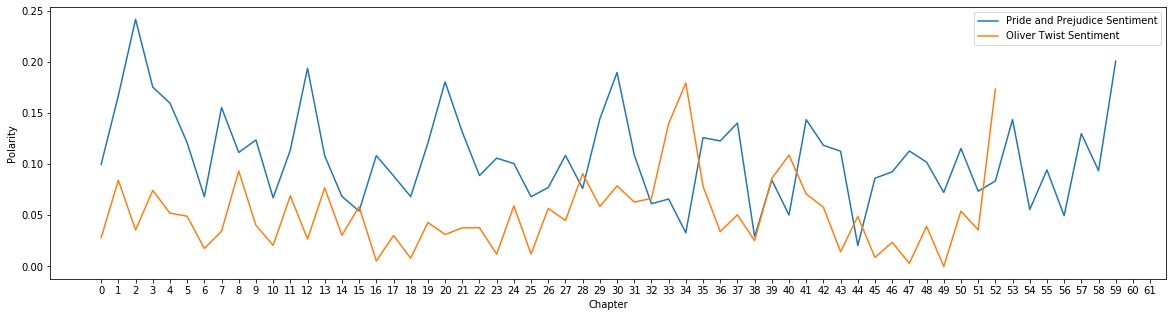

In [91]:
plt.figure(figsize=(20,5))
plt.plot(sentiment_list_PP,label='Pride and Prejudice Sentiment');
plt.plot(oliver_sentiment_subjectivity[0], label='Oliver Twist Sentiment');
plt.ylabel('Polarity');
plt.xlabel('Chapter');
plt.xticks([x for x in range(62)])
plt.legend();